![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |


How I approached the project

1. Load and inspect the Netflix data

2. Subset the DataFrame for "Movies"

3. Subset the columns of the new DataFrame

4. Filter the DataFrame by Movie duration

5. Assign colors to movie genres 

6.  Plot the movie duration by year using the genre colors created

7.  Subset a new DF excluding specific movie genres: Children, Stand-up, Documentaries

8.  Calculate the median duration of movie groupped by every 10 years.

9.  Plot the median movie duration by periods of time 

10.  Answer "Are we certain that movies are getting shorter?"

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28
162  A Christmas Special: Miraculous: Tales of Lady...  ...       22
171                         A Family Reunion Christmas  ...       29
177                    A Go! Go! Cory Carson Christmas  ...       22
178                    A Go! Go! Cory Carson Halloween  ...       22
179                  A Go! Go! Cory Carson Summer Camp  ...       21
181             A Grand Night In: The Story of Aardman  ...       59
200                            A Love Song for Latasha  ...       20
220                         A Russell Peters Christmas  ...       44
233                              A

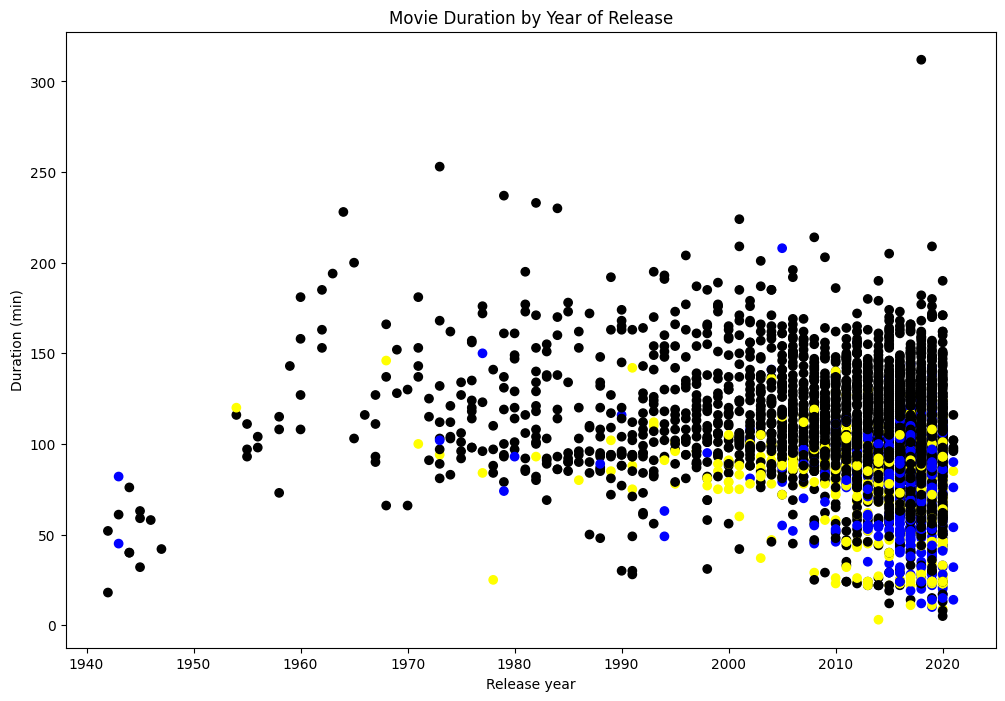

1     2010-now
2     2010-now
3    2000-2009
4    2000-2009
6     2010-now
Name: period_of_years, dtype: object
                 release_year  duration
period_of_years                        
before 1949            1944.0      52.0
1950-1959              1956.0     106.0
1960-1969              1965.0     137.0
1970-1979              1975.0     116.5
1980-1989              1984.0     108.0
1990-1999              1996.0     111.0
2000-2009              2006.0     113.0
2010-now               2017.0     100.5


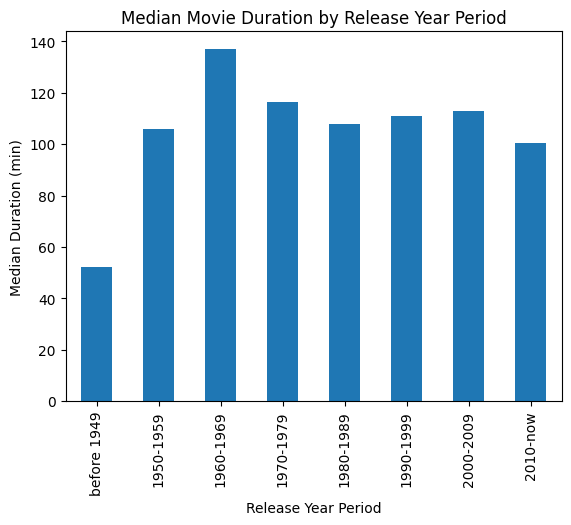

In [75]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

# Create netflit_df and print first 5 rows
netflix_df = pd.read_csv("netflix_data.csv")

# Subset for Movie type and only necessary columns
netflix_subset = netflix_df[netflix_df['type']=='Movie']
netflix_movies = netflix_subset[['title','country', 'genre', 'release_year','duration']]

# Filter the df by movie duration
short_movies = netflix_movies[netflix_movies['duration']<60]
print(short_movies.head(20))

# Assign colors to movie genres:
colors = []
for lab,row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('yellow')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-up':
        colors.append('red')
    else:
        colors.append('black')
    
# Plot the movie duration by years with the genre colors created:
fig = plt.figure(figsize=(12,8))
plt.scatter(data= netflix_movies, x='release_year',y='duration',c = colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title("Movie Duration by Year of Release")
plt.show()


# I want to know the median duration of movies changing over period of years that are not Children, Documentaries and Stand-up genre. Subset a new netflix_movies dataFrame excluding Children, Documentaries and stand-up genre

ss_netflix_movies = netflix_movies[(netflix_movies['genre'] != 'Children') & (netflix_movies['genre'] != 'Documentaries') & (netflix_movies['genre'] != 'Stand-up')]

# Convert release_year to integer
ss_netflix_movies['release_year'] = ss_netflix_movies['release_year'].apply(pd.to_numeric)

# Add the column period of years
period_of_years =[]
for index,row in ss_netflix_movies.iterrows():
    if row['release_year'] <= 1949:
        period_of_years.append('before 1949')
    elif (row['release_year'] >= 1950) and (row['release_year'] <= 1959):
        period_of_years.append('1950-1959')
    elif (row['release_year'] >= 1960) and (row['release_year'] <= 1969):
        period_of_years.append('1960-1969')
    elif (row['release_year'] >= 1970) and (row['release_year'] <= 1979):
        period_of_years.append('1970-1979')
    elif (row['release_year'] >= 1980) and (row['release_year'] <= 1989):
        period_of_years.append('1980-1989')
    elif (row['release_year'] >= 1990) and (row['release_year'] <= 1999):
        period_of_years.append('1990-1999')
    elif (row['release_year'] >= 2000) and (row['release_year'] <= 2009):
        period_of_years.append('2000-2009')
    else:
        period_of_years.append('2010-now')

ss_netflix_movies['period_of_years'] = period_of_years
print(ss_netflix_movies['period_of_years'].head())

# Check the median duration by year periods in the time order

per_year_duration = ss_netflix_movies.groupby('period_of_years').median().sort_values(by='release_year')
print(per_year_duration)

per_year_duration['duration'].plot(kind = 'bar')
plt.xlabel('Release Year Period')
plt.ylabel('Median Duration (min)')
plt.title('Median Movie Duration by Release Year Period')
plt.show()

# Answer "Are we certain that movies are getting shorter?"

#Non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot all the time. While it is clear that in the recent years, the number of short movies increased, the median of movie duration has been also fluatuaing. Therefore:

answer ='no'